In [1]:
#Importing Libraries
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt  

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)


c:\Users\sande\anaconda3\envs\my_learnings\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


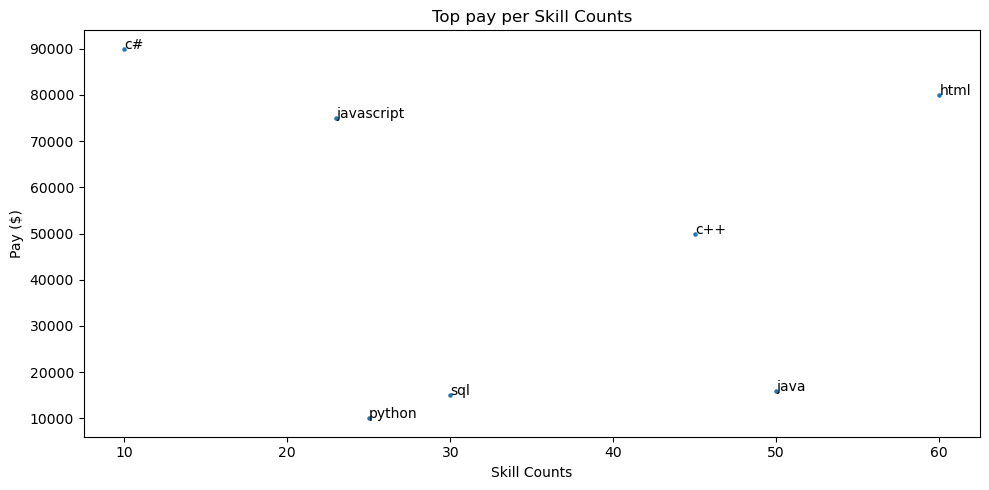

In [2]:
#we will cerate the new dict for practice. then we will transform it into the Dataframe. 
#We start by creating a dictionary named data containing three lists: job_skills for programming skills, 
# skill_count for the number of professionals skilled in each, and skill_pay for the average pay associated with each skill.

# This dictionary is converted into a DataFrame named df_00 using the pd.DataFrame method. 
# To prepare the data for analysis, we sort the DataFrame in descending order based on the skill_count column
# using sort_values and set the job_skills column as the index with set_index, making it easier to access skill names later.

# A scatter plot is then generated using the plot method, where the x-axis represents skill_count, 
# the y-axis represents skill_pay, and marker='.' specifies the style of the points.
# Since the scatter plot does not display the skill names by default,
# we use a for loop with enumerate to iterate over the index (skill names) of the DataFrame. Within the loop, plt.text() is
# used to label each point on the plot with the corresponding skill name by providing the x and y coordinates, retrieved using iloc[i].

# The loop works by assigning i as the position of each row and txt as the skill name, ensuring each skill is plotted at its exact location.
# Finally, axis labels (xlabel and ylabel) and 
# a title are added to enhance the plot's readability. The tight_layout() function adjusts the layout for better alignment, 
# and show() displays the final scatter plot titled “Top Pay per Skill Counts,” where pay increases with skill counts.

#creating the Dict
data = {
    'job_skills': ['python','sql', 'java','c++','c#', 'javascript','html'],
    'skill_count': [25,30,50,45,10,23,60],
    'skill_pay':[10000,15000,16000,50000,90000,75000,80000]
}

df_00 = pd.DataFrame(data) #converting to DataFrame

df_00 =df_00.sort_values(by='skill_count',ascending=False) #sorting it by counts so we have highest count first
df_00=df_00.set_index('job_skills')   #setting the index to help out with our for loop to fextch the skill names.




df_00.plot(kind='scatter',x='skill_count',y='skill_pay', marker='.',figsize=(10,5)) 

for i,txt in enumerate(df_00.index):
     plt.text(df_00['skill_count'].iloc[i],df_00['skill_pay'].iloc[i],txt) 

plt.ylabel('Pay ($)')
plt.xlabel('Skill Counts')
plt.title('Top pay per Skill Counts' )
plt.tight_layout()


In [3]:
#now lets do some similar on the our dataframe.
#we just doing it for the Data analyst. We can create the copy, but its not needed here.
#we are assigning df to itself doing filteration for the Data analayst role in job_title_short coloumn

df = df[df['job_title_short'] == 'Data Analyst']

df


,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,"[r, python, sql, nosql, power bi, tableau]","{'analyst_tools': ['power bi', 'tableau'], 'pr..."
12,Data Analyst,Stagiaire Data Analyst (H/F) - Lyon (69006),"Lyon, France",via Jobijoba,Full-time and Internship,False,France,2023-12-22 13:24:41,False,False,France,None,NaN,NaN,Engie,"[sql, php, excel, power bi, sap, jira]","{'analyst_tools': ['excel', 'power bi', 'sap']..."
18,Data Analyst,Data Analyst,"Warsaw, Poland",via Praca Trabajo.org,Full-time,False,Poland,2023-10-16 13:36:54,False,False,Poland,None,NaN,NaN,Glovo,"[sql, python, r, redshift, pandas, excel, look...","{'analyst_tools': ['excel', 'looker', 'tableau..."
31,Data Analyst,Stage - Data Analyst F/H,"Paris, France",via LinkedIn,Full-time and Internship,False,France,2023-10-19 13:59:31,False,False,France,None,NaN,NaN,GROUPE BON MARCHÉ : Le Bon Marché Rive Gauche ...,[sql],{'programming': ['sql']}
34,Data Analyst,Data Analyst als Marketing Manager Automation ...,"Erlangen, Germany",via Central Illinois Proud Jobs,Full-time,False,Germany,2023-02-23 13:31:28,True,False,Germany,None,NaN,NaN,DEFACTO GmbH,[sap],{'analyst_tools': ['sap']}
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785703,Data Analyst,Data Analyst - CRYPTOGRAPHY - Full-time,Anywhere,via Snagajob,Full-time,True,"Texas, United States",2023-01-28 06:02:55,True,False,United States,None,NaN,NaN,Axelon Services Corporation,None,None
785705,Data Analyst,Expert Business Data Analyst - Now Hiring,"Oakland, CA",via Snagajob,Full-time,False,"California, United States",2023-01-09 06:00:25,False,False,United States,None,NaN,NaN,PG&E Corporation,"[sql, python, tableau]","{'analyst_tools': ['tableau'], 'programming': ..."
785715,Data Analyst,Amul Careers 2023 - Apply Online - Data Analys...,India,melalui Jobsleworld - Jobs In India - Job Vaca...,Pekerjaan tetap,False,India,2023-03-13 06:16:28,False,False,India,None,NaN,NaN,Amul,None,None
785717,Data Analyst,Data & Analytics Architect (w/m/x),"Erfurt, Jerman",melalui LinkedIn,Pekerjaan tetap,False,Germany,2023-03-12 06:18:18,False,False,Germany,None,NaN,NaN,NTT DATA DACH,"[aws, azure]","{'cloud': ['aws', 'azure']}"


In [4]:
df_exploded = df.explode('job_skills')  #since the skills is in list we will explode that coloumn and used to group it to get the counts of it

df_exploded


,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,r,"{'analyst_tools': ['power bi', 'tableau'], 'pr..."
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,python,"{'analyst_tools': ['power bi', 'tableau'], 'pr..."
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,sql,"{'analyst_tools': ['power bi', 'tableau'], 'pr..."
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,nosql,"{'analyst_tools': ['power bi', 'tableau'], 'pr..."
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,power bi,"{'analyst_tools': ['power bi', 'tableau'], 'pr..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785717,Data Analyst,Data & Analytics Architect (w/m/x),"Erfurt, Jerman",melalui LinkedIn,Pekerjaan tetap,False,Germany,2023-03-12 06:18:18,False,False,Germany,None,NaN,NaN,NTT DATA DACH,azure,"{'cloud': ['aws', 'azure']}"
785737,Data Analyst,CRM Data Analyst,"Bad Rodach, Jerman",melalui BeBee Deutschland,Pekerjaan tetap,False,Germany,2023-03-12 06:18:18,False,False,Germany,None,NaN,NaN,HABA FAMILYGROUP,sas,"{'analyst_tools': ['sas', 'excel'], 'programmi..."
785737,Data Analyst,CRM Data Analyst,"Bad Rodach, Jerman",melalui BeBee Deutschland,Pekerjaan tetap,False,Germany,2023-03-12 06:18:18,False,False,Germany,None,NaN,NaN,HABA FAMILYGROUP,sas,"{'analyst_tools': ['sas', 'excel'], 'programmi..."
785737,Data Analyst,CRM Data Analyst,"Bad Rodach, Jerman",melalui BeBee Deutschland,Pekerjaan tetap,False,Germany,2023-03-12 06:18:18,False,False,Germany,None,NaN,NaN,HABA FAMILYGROUP,sql,"{'analyst_tools': ['sas', 'excel'], 'programmi..."


In [5]:
#now we are crating new variable. we will be using to groupby to group all the skills. the this is new we want to do multiple aggreegation 
#on the data frame so we will be using .agg() method. inside the bracket we will be creating 2  new coloumn 
#to get the median salary and skill count. make sure while creatign the new coloumns the bracket are tuple you first provide column of interest and , 
#agg function you want to perform.

skills_stats = df_exploded.groupby('job_skills'). agg(
    median_salary = ('salary_year_avg', 'median'),
    skill_count = ('job_skills','count')
)
skills_stats = skills_stats.sort_values(by='skill_count', ascending=False).head(10) #we will sort it by counts so we can get top 10.

skills_stats 

,median_salary,skill_count
job_skills,,
sql,92500.0,92428
excel,84479.0,66860
python,98500.0,57190
tableau,95000.0,46455
power bi,90000.0,39380
r,92527.5,29996
sas,90000.0,27998
powerpoint,85000.0,13822
word,80000.0,13562


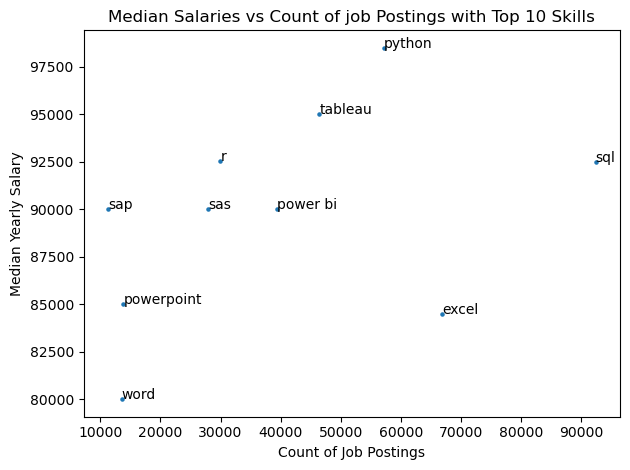

In [6]:
skills_stats.plot(kind='scatter',x='skill_count', y='median_salary',marker='.'  ) #just plotting the scattrer plot.
plt.xlabel('Count of Job Postings')
plt.ylabel('Median Yearly Salary')
plt.title('Median Salaries vs Count of job Postings with Top 10 Skills')
plt.tight_layout()

for i,txt in enumerate(skills_stats.index): #loop to get the x & y co ordinates and txt to plot on the graph 
    plt.text(skills_stats['skill_count'].iloc[i],skills_stats['median_salary'].iloc[i],txt)
 
plt.show()



In [7]:
#Scatter plot is good for to show the correlation between two variables.
